In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data set load and overview

In [2]:
df = pd.read_csv('data.csv')
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [3]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.shape

(11914, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [7]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


# Missing Values Check

In [8]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

###  Fuel Type – Fill in mode

In [9]:
df['Engine Fuel Type'].fillna(df['Engine Fuel Type'].mode()[0], inplace=True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_19604\1413289471.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Engine Fuel Type'].fillna(df['Engine Fuel Type'].mode()[0], inplace=True)


In [10]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

### Engine HP –  fill in Median (avoid outliers)


In [11]:
df['Engine HP'].fillna(df['Engine HP'].median(), inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_19604\217182256.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Engine HP'].fillna(df['Engine HP'].median(), inplace=True)


In [12]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

### Engine Cylinders – fill in mode

In [13]:
df['Engine Cylinders'].fillna(df['Engine Cylinders'].mode()[0], inplace=True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_19604\1844351206.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Engine Cylinders'].fillna(df['Engine Cylinders'].mode()[0], inplace=True)


In [14]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

Market Category column dropped because it has too many missing values ​​(3742)

In [15]:
data1 = df.drop(columns=['Market Category'],inplace=True)

In [16]:
data1

In [17]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      6
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

### Missing values visualization

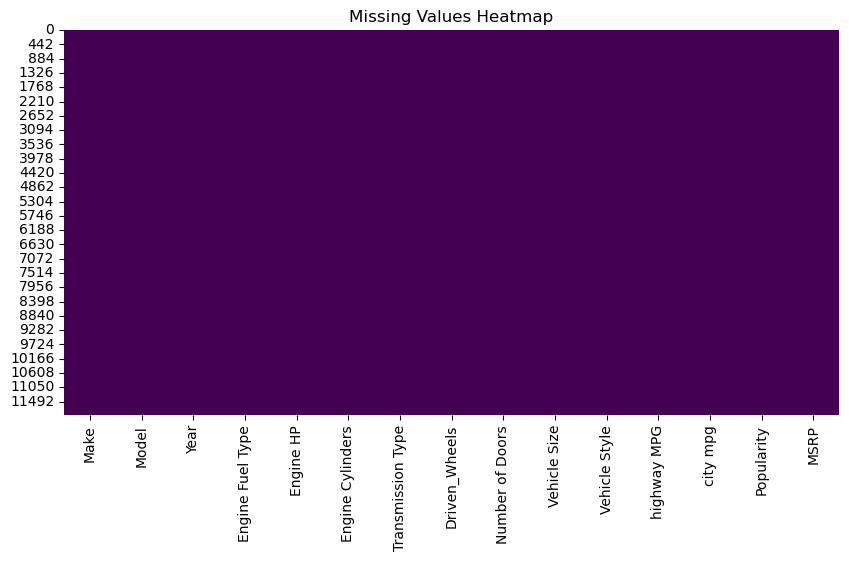

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

### Correlation heatmap (numeric columns only)

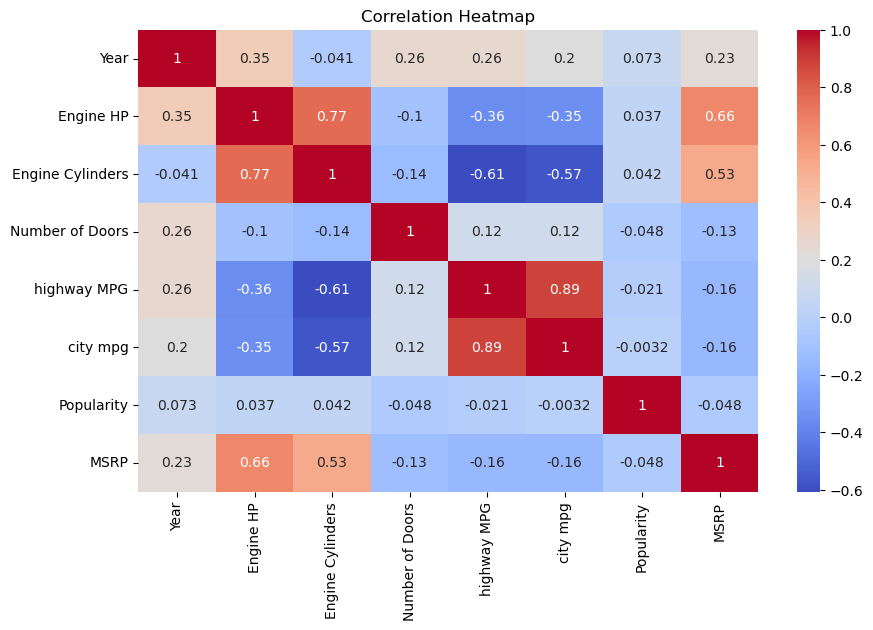

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Distribution of key numeric features

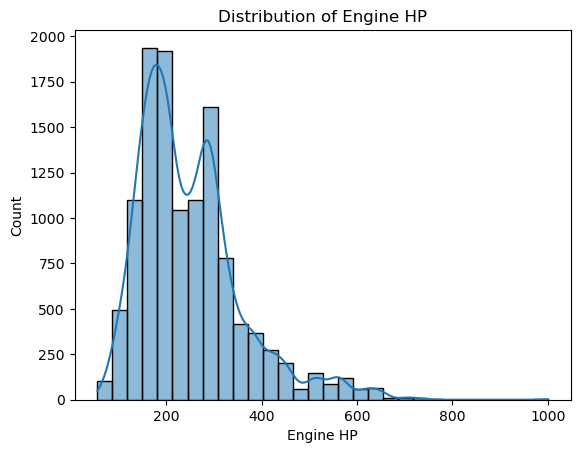

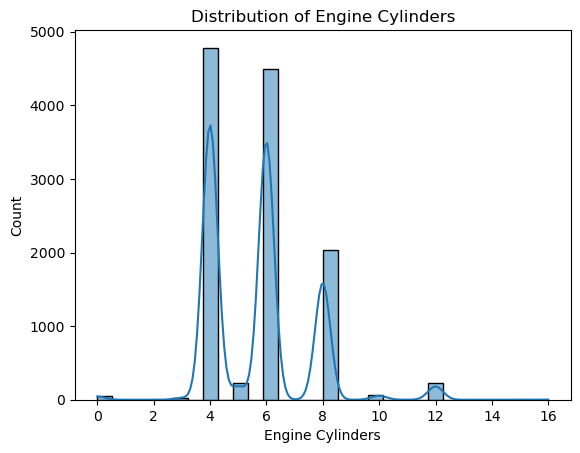

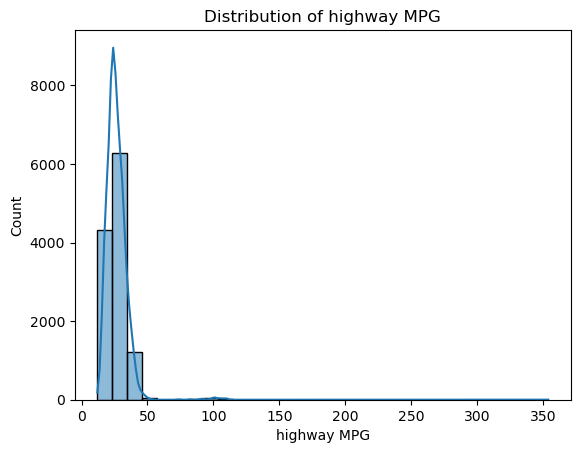

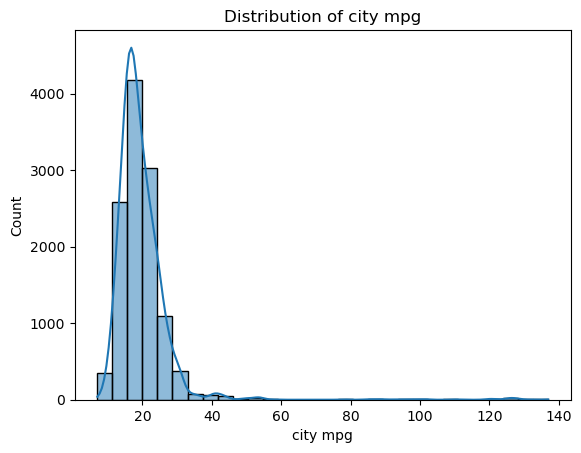

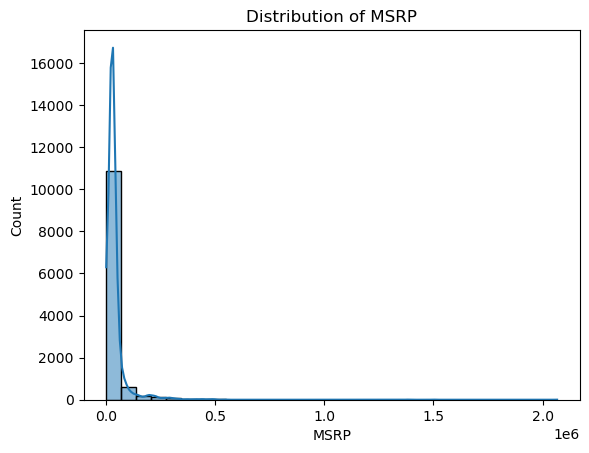

In [20]:
numeric_cols = ['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'MSRP']
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

### Top car makes count


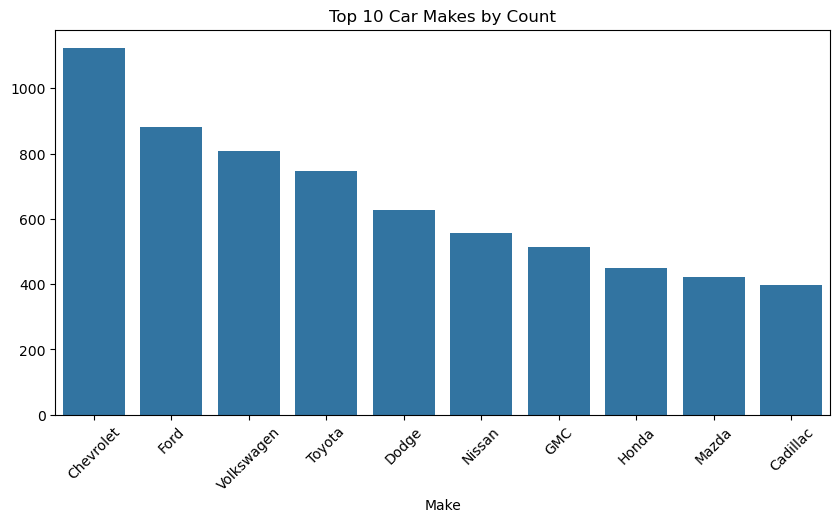

In [21]:
plt.figure(figsize=(10,5))
top_makes = df['Make'].value_counts().head(10)
sns.barplot(x=top_makes.index, y=top_makes.values)
plt.title("Top 10 Car Makes by Count")
plt.xticks(rotation=45)
plt.show()

### Vehicle Size vs Average Price

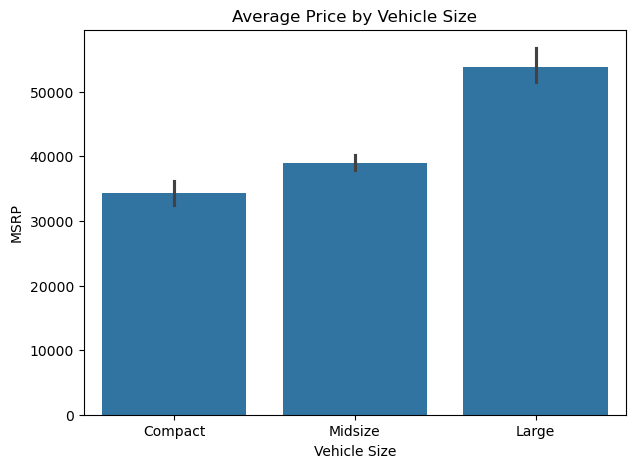

In [22]:
plt.figure(figsize=(7,5))
sns.barplot(x='Vehicle Size', y='MSRP', data=df)
plt.title("Average Price by Vehicle Size")
plt.show()


### Transmission Type vs Average Price

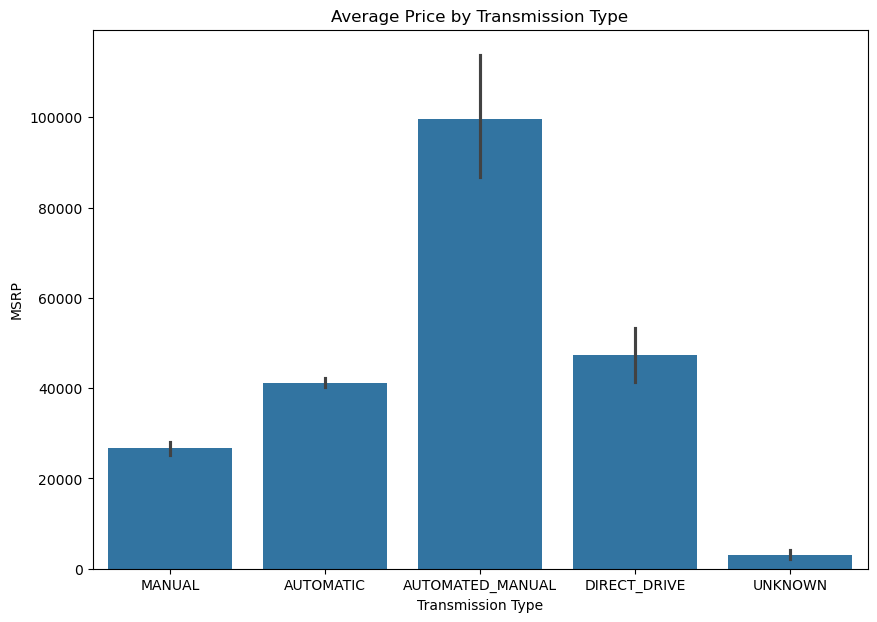

In [23]:
plt.figure(figsize=(10,7))
sns.barplot(x='Transmission Type', y='MSRP', data=df)
plt.title("Average Price by Transmission Type")
plt.show()

### Driven Wheels vs Average Price

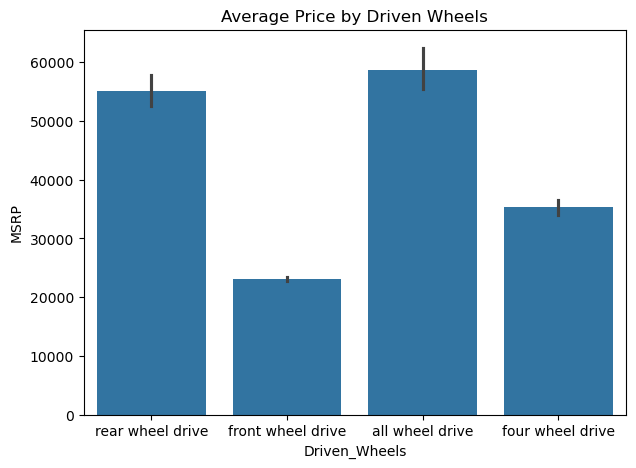

In [24]:
plt.figure(figsize=(7,5))
sns.barplot(x='Driven_Wheels', y='MSRP', data=df)
plt.title("Average Price by Driven Wheels")
plt.show()

### Year vs Average Price trend

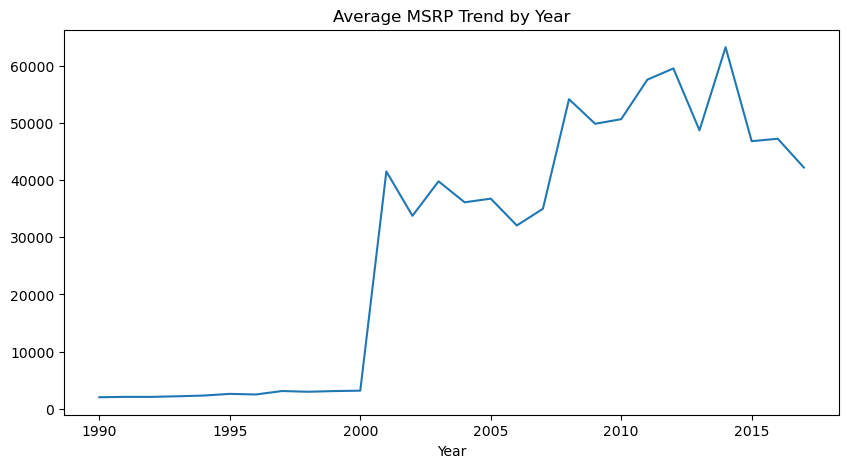

In [25]:
yearly_price = df.groupby("Year")["MSRP"].mean()
plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_price.index, y=yearly_price.values)
plt.title("Average MSRP Trend by Year")
plt.show()

### Engine HP vs MSRP

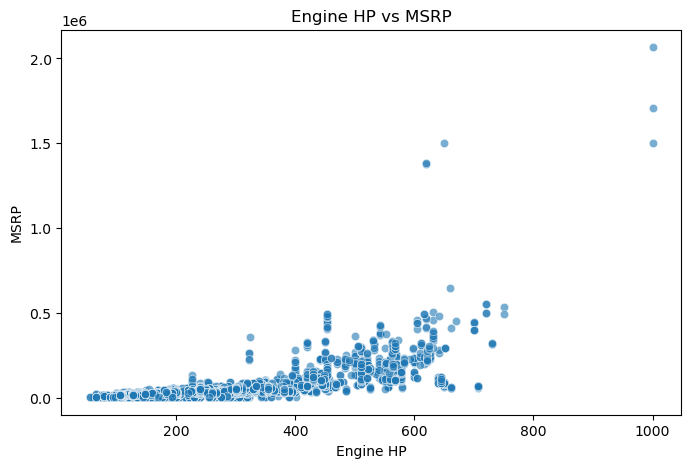

In [26]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Engine HP', y='MSRP', data=df, alpha=0.6)
plt.title('Engine HP vs MSRP')
plt.show()

### Engine Cylinders vs MSRP

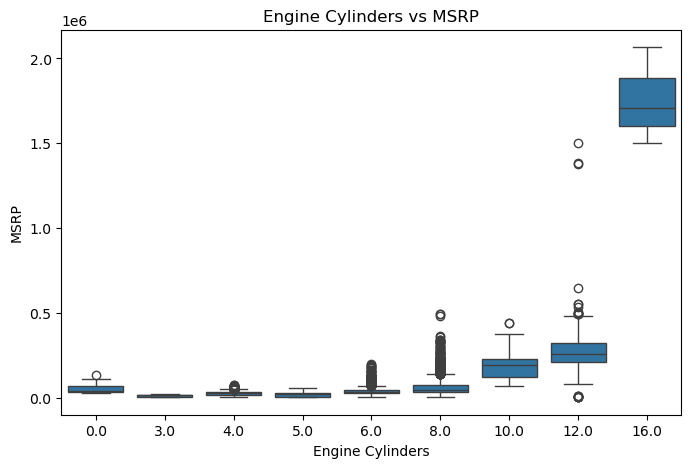

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Engine Cylinders', y='MSRP', data=df)
plt.title('Engine Cylinders vs MSRP')
plt.show()

### Engine Fuel Type vs Average Price

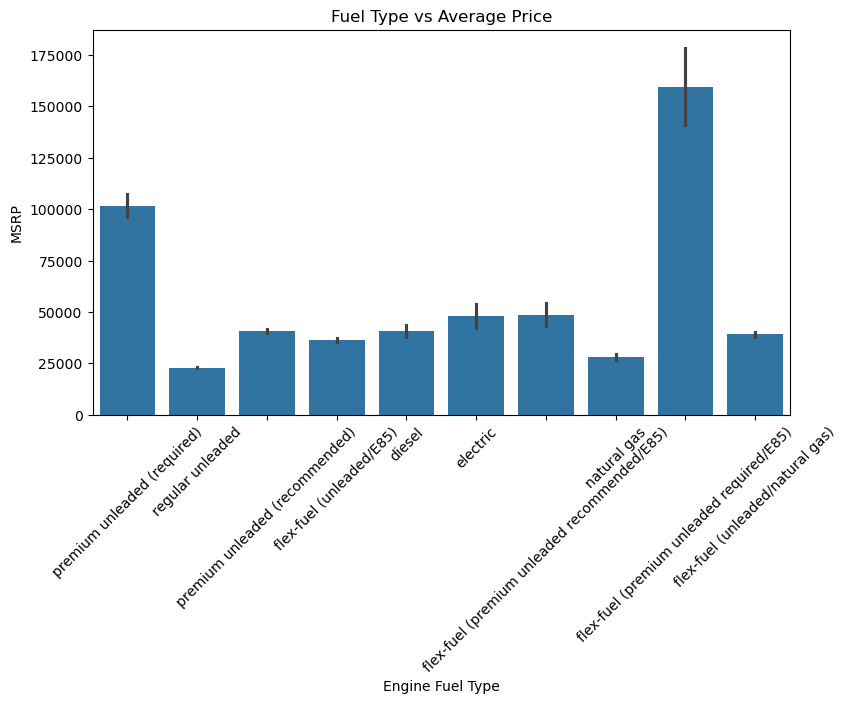

In [28]:
plt.figure(figsize=(9,5))
sns.barplot(x='Engine Fuel Type', y='MSRP', data=df)
plt.title('Fuel Type vs Average Price')
plt.xticks(rotation=45)
plt.show()

### Popularity vs MSRP

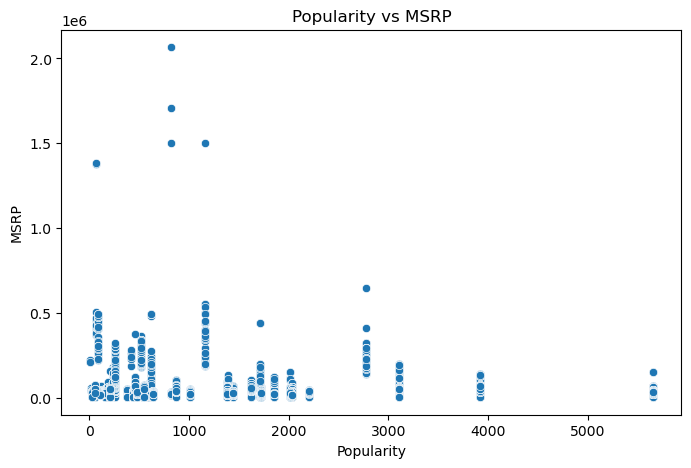

In [29]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Popularity', y='MSRP', data=df)
plt.title('Popularity vs MSRP')
plt.show()

### Vehicle Style vs Average Price

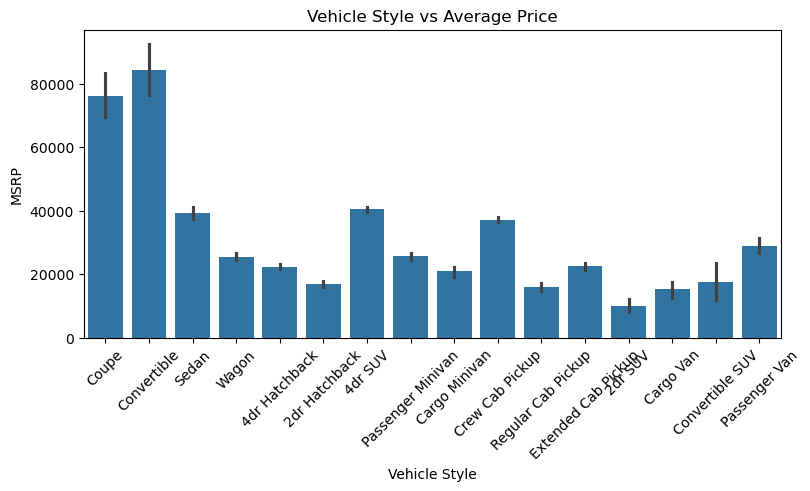

In [30]:
plt.figure(figsize=(9,4))
sns.barplot(x='Vehicle Style', y='MSRP', data=df)
plt.title('Vehicle Style vs Average Price')
plt.xticks(rotation=45)
plt.show()

### Transmission Type vs Highway MPG

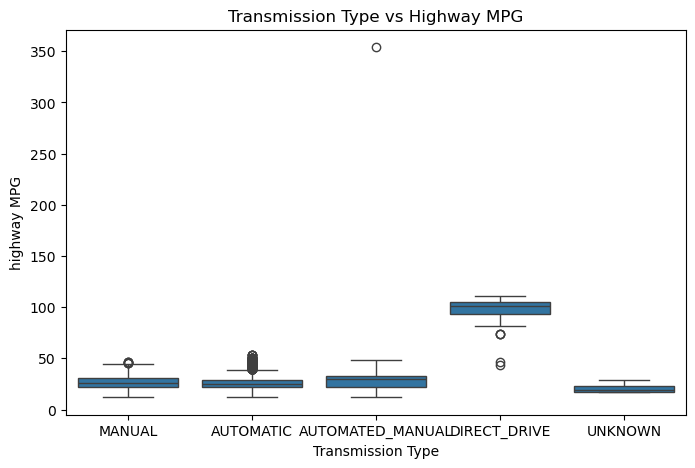

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Transmission Type', y='highway MPG', data=df)
plt.title('Transmission Type vs Highway MPG')
plt.show()

### Vehicle Size vs Engine HP

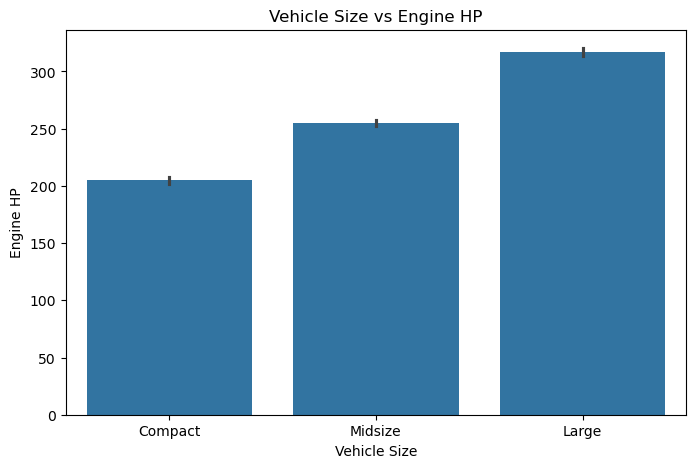

In [32]:
plt.figure(figsize=(8,5))
sns.barplot(x='Vehicle Size', y='Engine HP', data=df)
plt.title('Vehicle Size vs Engine HP')
plt.show()

### Outlier Detection for MSRP

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['MSRP'])
plt.title('Outlier Detection in MSRP')
plt.show()

# conclusion

This EDA clearly shows that engine power, vehicle size, and fuel type are the strongest indicators of a car’s price.
Brands, transmission type, and year of manufacture also play an important secondary role.